In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/DAB_UPI_Data")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
DF1 = pd.read_excel("UPI_Dataset_App (2).xlsx")

DF1.head(5)

,Month,Year,Date,Sr.No.,Application Name,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","B2C Transactions, Volume (Mn)","B2C Transactions, Value (Cr)","B2B Transactions, Volume (Mn)","B2B Transactions, Value (Cr)","On-us Transactions, Volume (Mn)","On-us Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
0,1900-01-08 00:00:00,2022,2022-8,1,Airtel Payments Bank Apps,7.96,608.38,-,-,0,0.01,0,0.11,7.96,608.50
1,1900-01-08 00:00:00,2022,2022-8,2,Allahabad Bank Apps,0.03,7.70,-,-,-,-,-,-,0.03,7.70
2,8,2022,2022-8,3,Amazon Pay,62.43,6353.15,-,-,-,-,-,-,62.43,6353.15
3,8,2022,2022-8,4,AU Small Finance Bank Apps,0.45,138.70,-,-,-,-,-,-,0.45,138.70
4,8,2022,2022-8,5,Axis Bank Apps,7.39,1313.76,50.7,42.71,0.02,1.42,-,-,58.11,1357.89


In [ ]:
DF1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Month                                         1952 non-null   object 
 1   Year                                          1952 non-null   int64  
 2   Date                                          1952 non-null   object 
 3   Sr.No.                                        1952 non-null   int64  
 4   Application Name                              1952 non-null   object 
 5   Customer Initiated Transactions, Volume (Mn)  1952 non-null   float64
 6   Customer Initiated Transactions, Value (Cr)   1952 non-null   float64
 7   B2C Transactions, Volume (Mn)                 1952 non-null   object 
 8   B2C Transactions, Value (Cr)                  1952 non-null   object 
 9   B2B Transactions, Volume (Mn)                 1952 non-null   o

In [ ]:
DF1.describe()

,Year,Sr.No.,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,2021.133197,30.296107,64.585102,11497.933560,66.503719,11692.481849
std,0.804705,17.459198,330.885865,58907.888391,332.938077,59108.496943
min,2020.000000,1.000000,0.010000,0.070000,0.010000,0.070000
25%,2020.000000,15.000000,0.040000,13.772500,0.040000,13.772500
50%,2021.000000,30.000000,0.170000,55.810000,0.180000,55.810000
75%,2022.000000,45.000000,2.302500,407.245000,2.302500,408.762500
max,2022.000000,68.000000,3674.240000,639348.780000,3674.240000,639348.780000


In [ ]:
DF1['Total, Volume (Mn)'] = DF1['Total, Volume (Mn)'].astype(int)


In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Month                                         1952 non-null   object 
 1   Year                                          1952 non-null   int64  
 2   Date                                          1952 non-null   object 
 3   Sr.No.                                        1952 non-null   int64  
 4   Application Name                              1952 non-null   object 
 5   Customer Initiated Transactions, Volume (Mn)  1952 non-null   float64
 6   Customer Initiated Transactions, Value (Cr)   1952 non-null   float64
 7   B2C Transactions, Volume (Mn)                 1952 non-null   object 
 8   B2C Transactions, Value (Cr)                  1952 non-null   object 
 9   B2B Transactions, Volume (Mn)                 1952 non-null   o

In [ ]:
DF4 = DF1[['Application Name', 'Total, Volume (Mn)']]
DF4['Percentage'] = (DF4['Total, Volume (Mn)'] / DF4['Total, Volume (Mn)'].sum()) * 100

DF4.head(5)

,Application Name,"Total, Volume (Mn)",Percentage
0,Airtel Payments Bank Apps,7,0.005413
1,Allahabad Bank Apps,0,0.000000
2,Amazon Pay,62,0.047946
3,AU Small Finance Bank Apps,0,0.000000
4,Axis Bank Apps,58,0.044853



Total Volume per Application (Decreasing Order):
            Application Name  Percentage
119                  PhonePe   44.887559
67                Google Pay   34.972779
118  Paytm Payments Bank App   14.314990
13            Axis Bank Apps    1.281397
7                 Amazon Pay    1.188598
164            Yes Bank Apps    0.703724
73           ICICI Bank Apps    0.594686
14                      BHIM    0.583859
8                  AmazonPay    0.360369
38                      Cred    0.212664


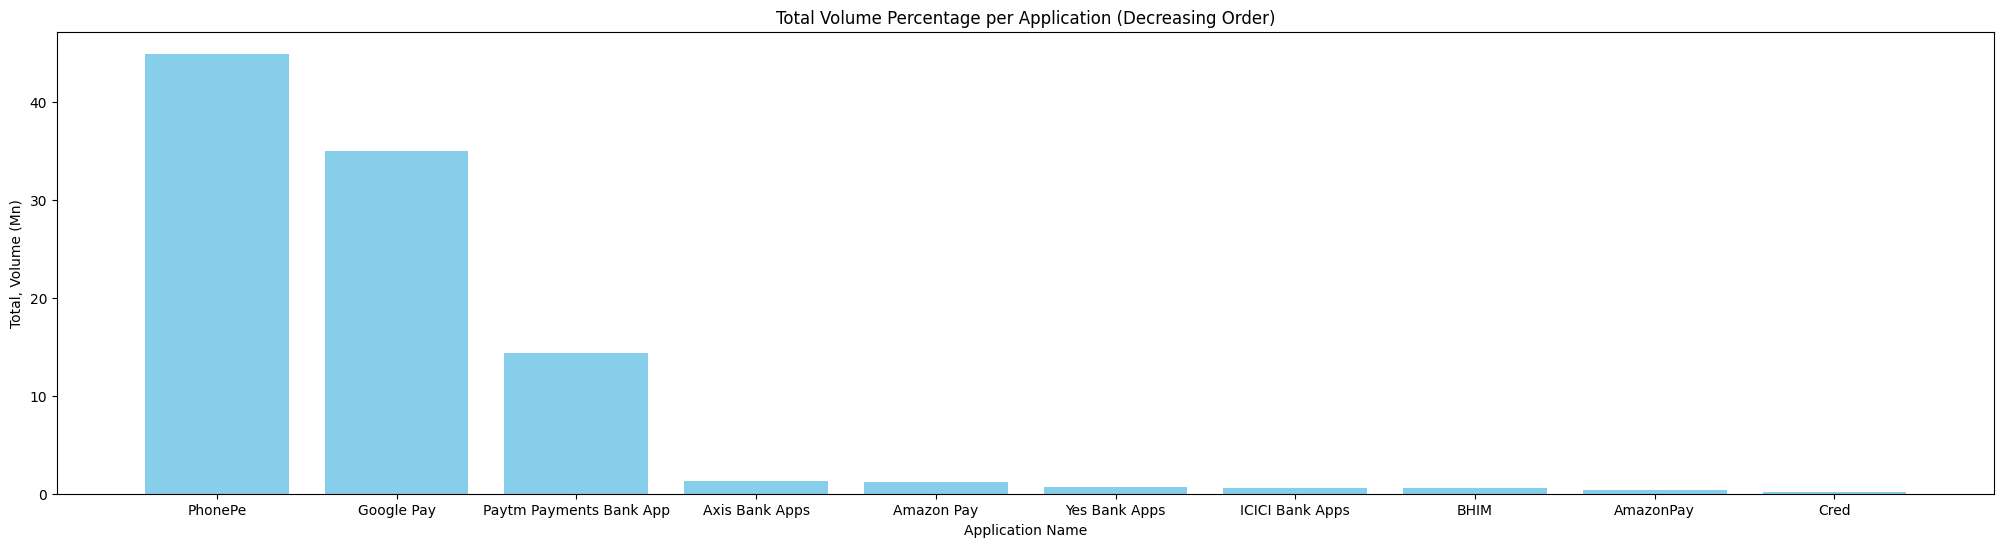

<Axes: title={'center': 'Total Volume Percentage per Application (Decreasing Order)'}, xlabel='Application Name', ylabel='Percentage'>

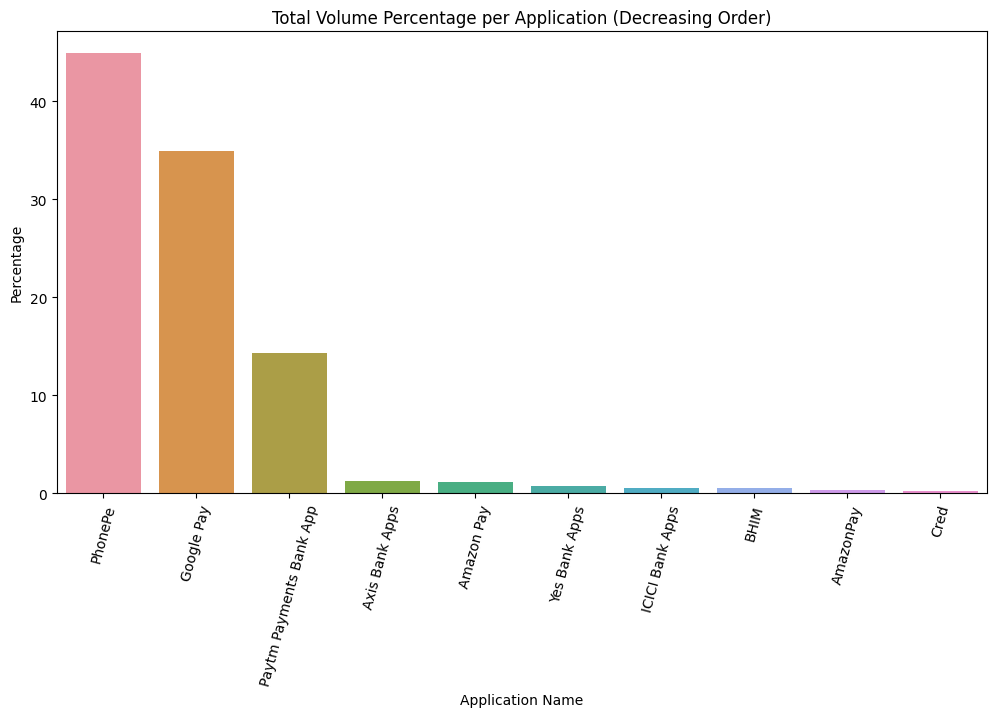

In [ ]:
total_volume_per_app = DF4.groupby('Application Name')['Percentage'].sum().reset_index()

# Sort in decreasing order based on total volume
total_volume_per_app_sorted = total_volume_per_app.sort_values(by='Percentage', ascending=False)

total_volume_per_app_sorted = total_volume_per_app_sorted.head(10)
# Display the result
print("\nTotal Volume per Application (Decreasing Order):")
print(total_volume_per_app_sorted)

plt.figure(figsize=(25, 6))
plt.bar(total_volume_per_app_sorted['Application Name'], total_volume_per_app_sorted['Percentage'], color='skyblue')
plt.title('Total Volume Percentage per Application (Decreasing Order)')
plt.xlabel('Application Name')
plt.ylabel('Total, Volume (Mn)')
plt.show()

plt.figure(figsize =(12,6))
plt.xticks (rotation = 75)
plt.title ('Total Volume Percentage per Application (Decreasing Order)')
sns.barplot (x= 'Application Name', y = 'Percentage', data = total_volume_per_app_sorted)

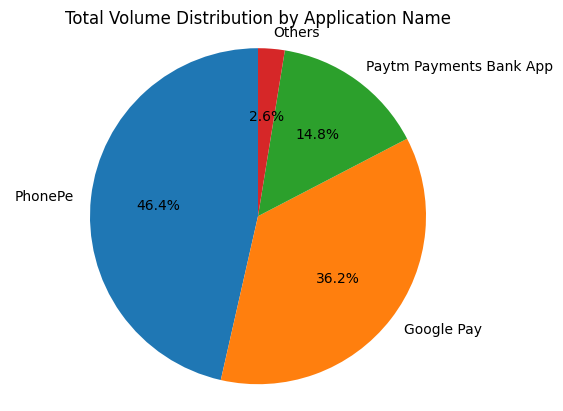

In [ ]:
DFX = total_volume_per_app_sorted.head()

DFX

top_3_apps = DFX.nlargest(3, 'Percentage')

# Create a new DataFrame combining top 3 and "Others"
combined_df = pd.concat([top_3_apps, pd.DataFrame({
    'Application Name': ['Others'],
    'Percentage': [DFX.loc[~DFX['Application Name'].isin(top_3_apps['Application Name']), 'Percentage'].sum()]
})])

combined_df

fig, ax = plt.subplots()
ax.pie(combined_df['Percentage'], labels=combined_df['Application Name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Total Volume Distribution by Application Name')
plt.show()



In [ ]:
total_volume_per_app = DF1.groupby('Application Name')['Total, Volume (Mn)'].sum().reset_index()
total_volume_per_app

total_volume_per_app_sorted = total_volume_per_app.sort_values(by='Total, Volume (Mn)', ascending=False)

total_volume_per_app_sorted

,Application Name,"Total, Volume (Mn)"
119,PhonePe,58045
67,Google Pay,45224
118,Paytm Payments Bank App,18511
13,Axis Bank Apps,1657
7,Amazon Pay,1537
164,Yes Bank Apps,910
73,ICICI Bank Apps,769
14,BHIM,755
8,AmazonPay,466
38,Cred,275


In [ ]:
DF1 = DF1.drop('Sr.No.', axis =1)

In [ ]:
DF2 = pd.read_excel("UPI_Benificary.xlsx")
DF2.head(5)

,Sr.No.,UPI Beneficiary Banks,Total Volume (In Mn),Approved %,BD%,TD%,Deemed Approved %,Month,Year
0,1,Paytm Payments Bank,368.90,0.9919,0.0078,0.0003,0.0001,January,2021
1,2,State Bank Of India,354.61,0.9759,0.0082,0.0152,0.0007,January,2021
2,3,Yes Bank Ltd,273.95,0.9984,0.0014,0.0001,0.0001,January,2021
3,4,ICICI Bank,237.59,0.9793,0.0083,0.0086,0.0038,January,2021
4,5,Axis Bank Ltd.,207.61,0.9944,0.0048,0.0001,0.0007,January,2021


In [ ]:
DF3 = pd.read_excel("UPI_Remit.xlsx")
DF3.head(5)

,Sr. No.,UPI Remitter Banks,Total Volume (In Mn),Approved %,BD %,TD %,Total Debit Reversal Count (In Mn),Debit Reversal Success %,Month,Year
0,1,State Bank Of India,664.75,0.9173,0.0683,0.0144,9.19,0.9804,January,2021
1,2,HDFC BANK LTD,206.65,0.9403,0.0462,0.0135,2.29,0.9483,January,2021
2,3,Axis Bank Ltd.,173.38,0.9639,0.0351,0.001,1.06,0.8720,January,2021
3,4,ICICI Bank,152.06,0.9281,0.0522,0.0197,2.79,0.5174,January,2021
4,5,Paytm Payments Bank,145.61,0.9185,0.0810,0.0005,1.24,0.9680,January,2021


In [ ]:
DF2.info()
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr.No.                 1080 non-null   int64  
 1   UPI Beneficiary Banks  1080 non-null   object 
 2   Total Volume (In Mn)   1080 non-null   float64
 3   Approved %             1080 non-null   float64
 4   BD%                    1080 non-null   float64
 5   TD%                    1080 non-null   float64
 6   Deemed Approved %      1080 non-null   float64
 7   Month                  1080 non-null   object 
 8   Year                   1080 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 76.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sr. No.          

In [ ]:
DF2 = DF2.drop('Sr.No.', axis = 1)
DF3 = DF3.drop('Sr. No.', axis = 1)

In [ ]:
pivot_table = pd.pivot_table(DF1, values='Total, Volume (Mn)', index='Application Name', columns=['Year', 'Date'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year         Application Name    2020                                       \
Date                          2020-10 2020-11 2020-12 2020-4 2020-5 2020-6   
119                   PhonePe   839.0   868.0   902.0  374.0  452.0  492.0   
67                 Google Pay   857.0   960.0   854.0  440.0  547.0  592.0   
118   Paytm Payments Bank App   244.0   260.0   261.0  128.0  124.0  139.0   
13             Axis Bank Apps     4.0     5.0    92.0    2.0    2.0    2.0   
7                  Amazon Pay     NaN     NaN    40.0    NaN    NaN    NaN   

Year                        2021                                         \
Date 2020-7 2020-8 2020-9 2021-1 2021-10 2021-11 2021-12 2021-2  2021-3   
119   562.0  592.0  688.0  968.0  1937.0  1911.0  2077.0  975.0  1199.0   
67    640.0  697.0  751.0  853.0  1451.0  1447.0  1587.0  827.0   957.0   
118   158.0  170.0  208.0  332.0   632.0   631.0   706.0  340.0   401.0   
13      3.0    4.0    4.0   71.0    69.0    70.0    59.0   64.0    72.0   
7  

In [ ]:
DF1['Application Name'].value_counts()

Airtel Payments Bank Apps          33
Cointab                            33
Yes Bank Apps                      33
Ultracash                          33
Samsung Pay                        33
PhonePe                            33
Paytm Payments Bank App            33
Mobikwik                           33
Kotak Mahindra Bank Apps           33
ICICI Bank Apps                    33
HDFC Bank Apps                     33
Google Pay                         33
State Bank of India Apps           33
BHIM                               33
Axis Bank Apps                     33
Bajaj Finserv                      33
Cred                               32
MI Pay                             30
Bank of Baroda Apps                25
Union Bank Apps                    25
Amazon Pay                         25
WhatsApp                           25
MakeMy Trip                        23
IDBI Bank Apps                     18
Citi Bank Apps                     18
YuvaPay                            18
IDFC Bank Ap

In [ ]:
replacement_dict = {'Paytm Payment Bank' : 'Paytm Payments Bank App',
                    'Paytm Payments Bank': 'Paytm Payments Bank App',
                    'AmazonPay': 'Amazon Pay'}
DF1['Application Name'] = DF1['Application Name'].replace(replacement_dict)

In [ ]:
pivot_table = pd.pivot_table(DF1, values='Total, Volume (Mn)', index='Application Name', columns=['Year', 'Date'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year         Application Name    2020                                       \
Date                          2020-10 2020-11 2020-12 2020-4 2020-5 2020-6   
118                   PhonePe   839.0   868.0   902.0  374.0  452.0  492.0   
66                 Google Pay   857.0   960.0   854.0  440.0  547.0  592.0   
117   Paytm Payments Bank App   244.0   260.0   261.0  128.0  124.0  139.0   
7                  Amazon Pay    46.0    37.0    40.0   14.0   58.0   59.0   
12             Axis Bank Apps     4.0     5.0    92.0    2.0    2.0    2.0   

Year                        2021                                         \
Date 2020-7 2020-8 2020-9 2021-1 2021-10 2021-11 2021-12 2021-2  2021-3   
118   562.0  592.0  688.0  968.0  1937.0  1911.0  2077.0  975.0  1199.0   
66    640.0  697.0  751.0  853.0  1451.0  1447.0  1587.0  827.0   957.0   
117   158.0  170.0  208.0  332.0   632.0   631.0   706.0  340.0   401.0   
7      76.0   95.0   81.0   46.0    68.0    71.0    76.0   44.0    52.0   
12 

In [ ]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   UPI Remitter Banks                  1080 non-null   object 
 1   Total Volume (In Mn)                1080 non-null   float64
 2   Approved %                          1080 non-null   float64
 3   BD %                                1080 non-null   float64
 4   TD %                                1080 non-null   object 
 5   Total Debit Reversal Count (In Mn)  960 non-null    float64
 6   Debit Reversal Success %            1080 non-null   float64
 7   Month                               1080 non-null   object 
 8   Year                                1080 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 76.1+ KB


In [ ]:
pivot_table = pd.pivot_table(DF3, values='Total Volume (In Mn)', index='UPI Remitter Banks', columns=['Year', 'Month'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year    UPI Remitter Banks    2020                                            \
Month                        April  August December February January    July   
67     State Bank Of India  298.45  447.03   641.62   349.84  347.46  439.34   
39              ICICI Bank   65.05  107.44   150.54    93.76   91.71   95.87   
15          Bank of Baroda   42.49   70.05   116.17    50.88   49.58   61.78   
62     Paytm Payments Bank   68.72  111.45   147.56   115.52  103.11   97.69   
37           HDFC Bank Ltd     NaN     NaN      NaN      NaN     NaN     NaN   

Year                                                        2021           \
Month    June   March     May November October September   April   August   
67     390.60  338.19  365.64   607.92  599.24    510.21  755.71  1018.15   
39      86.65   91.56   78.15   140.01  133.83    115.58  164.83   217.79   
15      53.61   49.82   49.75   101.93   99.49     83.91  152.80   219.01   
62      84.36  100.93   74.64   169.25  138.93    132.

In [ ]:
replacement_dict = {'HDFC BANK LTD': 'HDFC Bank Ltd',
                    'AXIS BANK LTD': 'Axis Bank Ltd.',
                    'Axis Bank Ltd': 'Axis Bank Ltd.',
                    'CITI': 'Citibank',
                    'STATE BANK OF INDIA':'State Bank Of India',
                    'State Bank Of India':'State Bank Of India',
                    'BANK OF BARODA':'Bank of Baroda',
                    'Bank Of Baroda':'Bank of Baroda',
                    'ICICI BANK': 'ICICI Bank',
                    'Union Bank Of India':'Union Bank of India',
                    'UNION BANK OF INDIA':'Union Bank of India',
                    'PAYTM PAYMENTS BANK': 'Paytm Payments Bank',
                    'PUNJAB NATIONAL BANK' : 'Punjab National Bank'}
DF3['UPI Remitter Banks'] = DF3['UPI Remitter Banks'].replace(replacement_dict)

In [ ]:
pivot_table = pd.pivot_table(DF3, values='Total Volume (In Mn)', index='UPI Remitter Banks', columns=['Year', 'Month'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year    UPI Remitter Banks    2020                                            \
Month                        April  August December February January    July   
58     State Bank Of India  298.45  447.03   641.62   349.84  347.46  439.34   
32           HDFC Bank Ltd   79.76  141.51   198.89   120.61  117.52  125.56   
4           Axis Bank Ltd.   92.96  143.37   189.24   116.04  129.87  123.62   
11          Bank of Baroda   42.49   70.05   116.17    50.88   49.58   61.78   
33              ICICI Bank   65.05  107.44   150.54    93.76   91.71   95.87   

Year                                                        2021           \
Month    June   March     May November October September   April   August   
58     390.60  338.19  365.64   607.92  599.24    510.21  755.71  1018.15   
32     113.32  111.49   99.88   179.40  179.50    154.17  231.53   314.36   
4      119.30  112.34  124.97   241.92  184.44    157.86  191.12   235.25   
11      53.61   49.82   49.75   101.93   99.49     83.

In [ ]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UPI Beneficiary Banks  1080 non-null   object 
 1   Total Volume (In Mn)   1080 non-null   float64
 2   Approved %             1080 non-null   float64
 3   BD%                    1080 non-null   float64
 4   TD%                    1080 non-null   float64
 5   Deemed Approved %      1080 non-null   float64
 6   Month                  1080 non-null   object 
 7   Year                   1080 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 67.6+ KB


In [ ]:
pivot_table = pd.pivot_table(DF2, values='Total Volume (In Mn)', index='UPI Beneficiary Banks', columns=['Year', 'Month'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year  UPI Beneficiary Banks    2020                                     \
Month                         April  August December February January    
60      Paytm Payments Bank  133.85  216.18   338.64   230.84   216.00   
66      State Bank Of India  152.20  247.82   350.44   200.71   202.34   
75             Yes Bank Ltd  160.34  199.87   259.38   165.83   160.85   
37               ICICI Bank  158.37  206.65   255.64   152.23   151.65   
7             Axis Bank Ltd     NaN     NaN      NaN      NaN      NaN   

Year                                                                2021  \
Month    July    June   March     May November October September   April   
60     196.74  174.79  204.07  155.65   329.04  297.27    254.71  430.04   
66     248.68  220.07  186.69  204.35   363.23  340.69    292.22  396.30   
75     189.76  167.76   85.75  169.03   255.73  267.10    222.98  359.78   
37     197.30  182.40  169.97  177.86   249.17  216.88    206.99  248.84   
7         NaN     NaN    

In [ ]:
replacement_dict = {'HDFC BANK LTD': 'HDFC Bank Ltd',
                    'AXIS BANK LTD': 'Axis Bank Ltd',
                    'Axis Bank Ltd.': 'Axis Bank Ltd',
                    'CITI': 'Citibank',
                    'STATE BANK OF INDIA':'State Bank Of India',
                    'STATE BANK OF INDIA':'State Bank Of India',
                    'BANK OF BARODA':'Bank of Baroda',
                    'Bank Of Baroda':'Bank of Baroda',
                    'ICICI BANK': 'ICICI Bank',
                    'PAYTM PAYMENTS BANK': 'Paytm Payments Bank',
                    'YES BANK LTD': 'Yes Bank Ltd'}
DF2['UPI Beneficiary Banks'] = DF2['UPI Beneficiary Banks'].replace(replacement_dict)

In [ ]:
pivot_table = pd.pivot_table(DF2, values='Total Volume (In Mn)', index='UPI Beneficiary Banks', columns=['Year', 'Month'], aggfunc='sum')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

flattened_table = pivot_table.reset_index()
sorted_table = flattened_table.assign(Sum=flattened_table.sum(axis=1)).sort_values(by='Sum', ascending=False)

# Select the top 30 rows
top_5_data = sorted_table.head(5)

# Display the top 30 data
print(top_5_data)

Year  UPI Beneficiary Banks    2020                                     \
Month                         April  August December February January    
53      Paytm Payments Bank  133.85  216.18   338.64   230.84   216.00   
58      State Bank Of India  152.20  247.82   350.44   200.71   202.34   
66             Yes Bank Ltd  160.34  199.87   259.38   165.83   160.85   
31               ICICI Bank  158.37  206.65   255.64   152.23   151.65   
6             Axis Bank Ltd   60.99  131.96   201.99    88.70    93.91   

Year                                                                2021  \
Month    July    June   March     May November October September   April   
53     196.74  174.79  204.07  155.65   329.04  297.27    254.71  430.04   
58     248.68  220.07  186.69  204.35   363.23  340.69    292.22  396.30   
66     189.76  167.76   85.75  169.03   255.73  267.10    222.98  359.78   
31     197.30  182.40  169.97  177.86   249.17  216.88    206.99  248.84   
6      105.29   92.97   8

In [ ]:
#For DF1 - UPI Apps Dataset
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DF1['Month'] = pd.Categorical(DF1['Month'], categories=months_order, ordered=True)

# Group by 'Year' and 'Name', then find the top 3 names for each year based on 'Total Volume'
top10_names_per_year = DF1.groupby(['Year', 'Application Name'])['Total, Volume (Mn)'].sum().reset_index().groupby('Year').apply(lambda x: x.nlargest(10, 'Total, Volume (Mn)')).reset_index(drop=True).sort_values(by='Total, Volume (Mn)', ascending=False)

# Display the result
print(top10_names_per_year)

    Year           Application Name  Total, Volume (Mn)
20  2022                    PhonePe               34812
21  2022                 Google Pay               25351
10  2021                    PhonePe               17464
11  2021                 Google Pay               13535
22  2022    Paytm Payments Bank App               11184
0   2020                 Google Pay                6338
1   2020                    PhonePe                5769
12  2021    Paytm Payments Bank App                5635
2   2020    Paytm Payments Bank App                1692
13  2021             Axis Bank Apps                 834
23  2022                 Amazon Pay                 798
24  2022             Axis Bank Apps                 705
14  2021                 Amazon Pay                 699
25  2022              Yes Bank Apps                 525
3   2020                 Amazon Pay                 506
26  2022            ICICI Bank Apps                 460
27  2022                       BHIM             

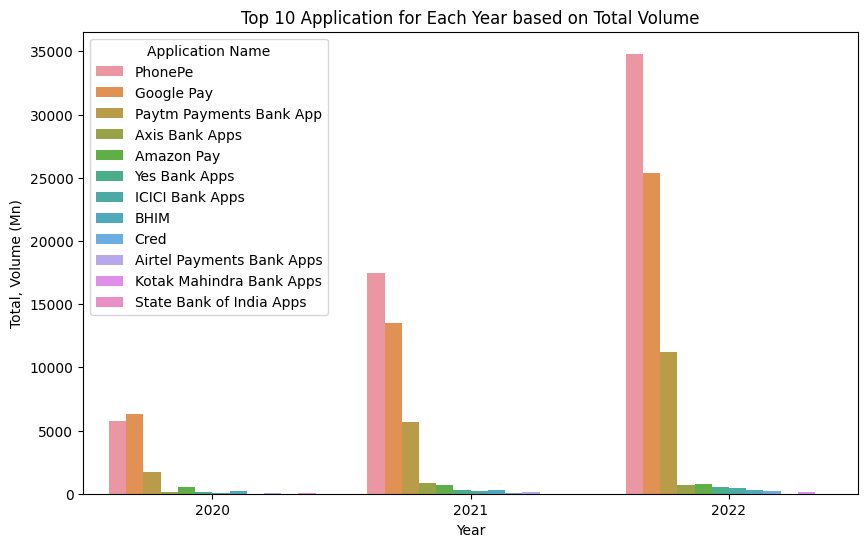

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total, Volume (Mn)', hue='Application Name', data=top10_names_per_year)
plt.title('Top 10 Application for Each Year based on Total Volume')
plt.xlabel('Year')
plt.ylabel('Total, Volume (Mn)')


custom_palette = sns.color_palette("Set2")  # You can choose any other palette
sns.set_palette(custom_palette)

plt.show()

In [ ]:
#For DF2 - UPI Beneficiary Dataset
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DF2['Month'] = pd.Categorical(DF2['Month'], categories=months_order, ordered=True)

# Group by 'Year' and 'Name', then find the top 3 names for each year based on 'Total Volume'
top10B_names_per_year = DF2.groupby(['Year', 'UPI Beneficiary Banks'])['Total Volume (In Mn)'].sum().reset_index().groupby('Year').apply(lambda x: x.nlargest(5, 'Total Volume (In Mn)')).reset_index(drop=True).sort_values(by='Total Volume (In Mn)', ascending=False)

# Display the result
print(top10B_names_per_year)

    Year UPI Beneficiary Banks  Total Volume (In Mn)
10  2022   Paytm Payments Bank              16617.37
11  2022          Yes Bank Ltd              10763.76
12  2022   State Bank Of India               9449.51
5   2021   Paytm Payments Bank               6852.42
6   2021   State Bank Of India               5745.82
13  2022         Axis Bank Ltd               5586.76
14  2022            ICICI Bank               5105.82
7   2021          Yes Bank Ltd               4799.09
8   2021            ICICI Bank               3610.37
9   2021         Axis Bank Ltd               3182.18
0   2020   State Bank Of India               3009.44
1   2020   Paytm Payments Bank               2747.78
2   2020            ICICI Bank               2325.11
3   2020          Yes Bank Ltd               2304.38
4   2020         Axis Bank Ltd               1464.39


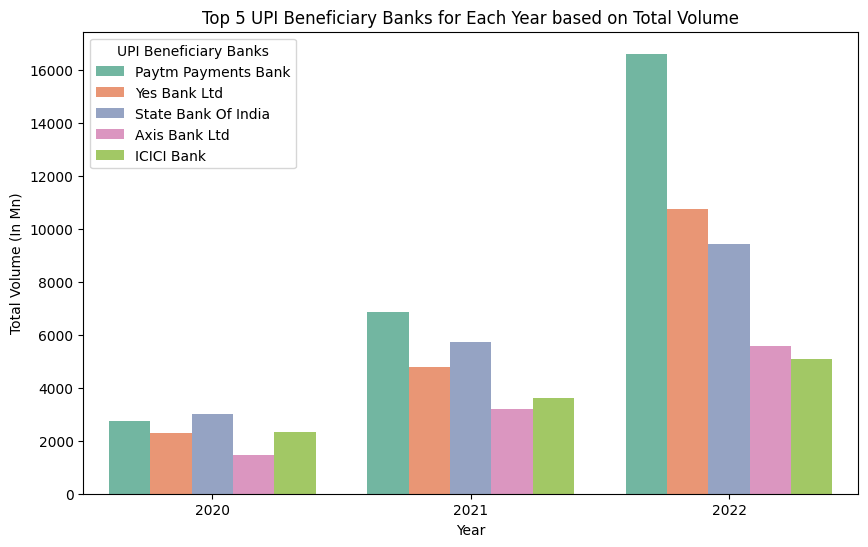

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Volume (In Mn)', hue='UPI Beneficiary Banks', data=top10B_names_per_year)
plt.title('Top 5 UPI Beneficiary Banks for Each Year based on Total Volume')
plt.xlabel('Year')
plt.ylabel('Total Volume (In Mn)')
plt.show()

In [ ]:
#For DF3 - UPI Remitter Dataset
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DF3['Month'] = pd.Categorical(DF3['Month'], categories=months_order, ordered=True)

# Group by 'Year' and 'Name', then find the top 3 names for each year based on 'Total Volume'
top10R_names_per_year = DF3.groupby(['Year', 'UPI Remitter Banks'])['Total Volume (In Mn)'].sum().reset_index().groupby('Year').apply(lambda x: x.nlargest(5, 'Total Volume (In Mn)')).reset_index(drop=True).sort_values(by='Total Volume (In Mn)', ascending=False)

# Display the result
print(top10R_names_per_year)

    Year   UPI Remitter Banks  Total Volume (In Mn)
10  2022  State Bank Of India              20249.63
5   2021  State Bank Of India              11061.24
11  2022        HDFC Bank Ltd               6627.07
0   2020  State Bank Of India               5335.54
12  2022       Bank of Baroda               4829.16
13  2022  Union Bank of India               4578.73
14  2022           ICICI Bank               4184.39
6   2021        HDFC Bank Ltd               3441.51
7   2021       Axis Bank Ltd.               2473.94
8   2021           ICICI Bank               2406.76
9   2021       Bank of Baroda               2351.62
1   2020       Axis Bank Ltd.               1735.93
2   2020        HDFC Bank Ltd               1621.61
3   2020  Paytm Payments Bank               1344.70
4   2020           ICICI Bank               1250.15


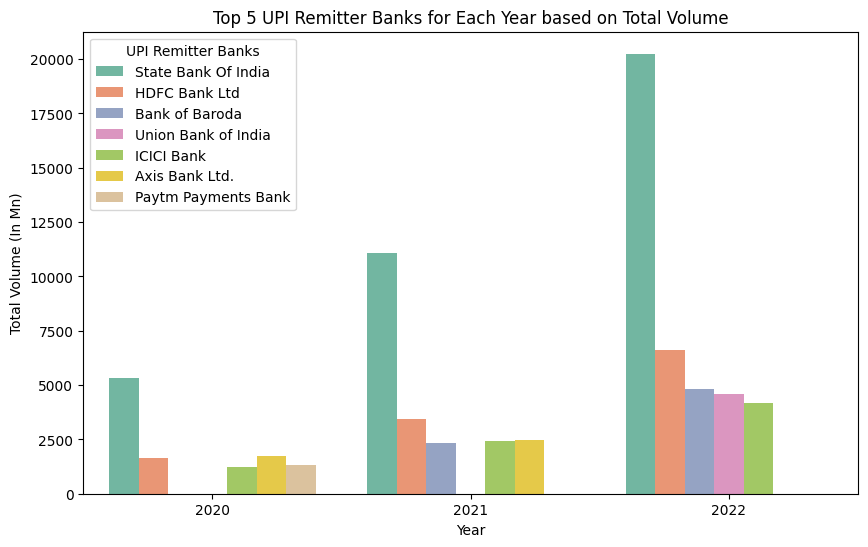

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Volume (In Mn)', hue='UPI Remitter Banks', data=top10R_names_per_year)
plt.title('Top 5 UPI Remitter Banks for Each Year based on Total Volume')
plt.xlabel('Year')
plt.ylabel('Total Volume (In Mn)')
plt.show()


In [ ]:
monthly_total_volume = DF1.groupby(['Year', 'Month'])['Total, Volume (Mn)'].sum().reset_index()

monthly_total_volume

,Year,Month,"Total, Volume (Mn)"
0,2020,January,0
1,2020,February,0
2,2020,March,0
3,2020,April,0
4,2020,May,0
5,2020,June,0
6,2020,July,0
7,2020,August,0
8,2020,September,0
9,2020,October,0


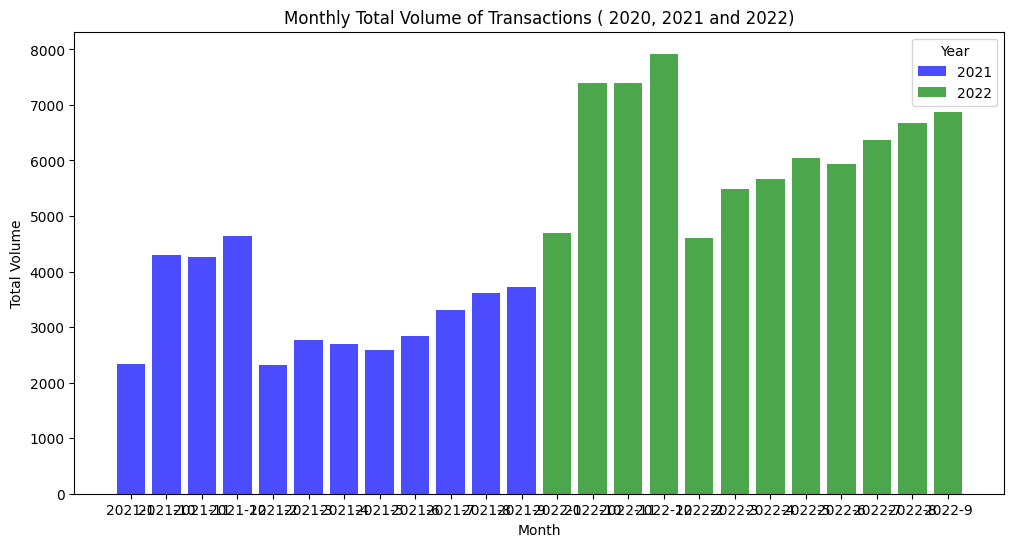

In [ ]:
monthly_total_volume = DF1.groupby(['Year', 'Date'])['Total, Volume (Mn)'].sum().reset_index()

last_two_years_data = monthly_total_volume[monthly_total_volume['Year'].isin([2020, 2021, 2022])]

# Plot the bar graph
plt.figure(figsize=(12, 6))

# Plot a bar for each year
for year, color in zip([2021, 2022], ['blue', 'green']):
    year_data = last_two_years_data[last_two_years_data['Year'] == year]
    plt.bar(year_data['Date'], year_data['Total, Volume (Mn)'], label=str(year), color=color, alpha=0.7)

# Customize the plot
plt.title('Monthly Total Volume of Transactions ( 2020, 2021 and 2022)')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.legend(title='Year')
plt.show()

In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Month                                         0 non-null      category
 1   Year                                          1952 non-null   int64   
 2   Date                                          1952 non-null   object  
 3   Application Name                              1952 non-null   object  
 4   Customer Initiated Transactions, Volume (Mn)  1952 non-null   float64 
 5   Customer Initiated Transactions, Value (Cr)   1952 non-null   float64 
 6   B2C Transactions, Volume (Mn)                 1952 non-null   object  
 7   B2C Transactions, Value (Cr)                  1952 non-null   object  
 8   B2B Transactions, Volume (Mn)                 1952 non-null   object  
 9   B2B Transactions, Value (Cr)                  1952 n

In [ ]:
DF1_Paytm = DF1[DF1['Application Name']=='Paytm Payments Bank App']

DF1_Paytm.head()



,Month,Year,Date,Application Name,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","B2C Transactions, Volume (Mn)","B2C Transactions, Value (Cr)","B2B Transactions, Volume (Mn)","B2B Transactions, Value (Cr)","On-us Transactions, Volume (Mn)","On-us Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
47,NaN,2022,2022-8,Paytm Payments Bank App,871.86,96034.11,4.11,10.37,0.38,458.24,110.05,17714.37,986,114217.10
113,NaN,2022,2022-9,Paytm Payments Bank App,924.77,101163.26,2.92,9.55,0.4,489.04,109.1,19143.49,1037,120805.34
176,NaN,2022,2022-10,Paytm Payments Bank App,995.34,112062.51,4.9,14.36,0.43,541.32,108.92,21002.36,1109,133620.54
241,NaN,2022,2022-11,Paytm Payments Bank App,973.85,109008.43,4.12,14.81,0.37,491.76,103.13,19290.91,1081,128805.91
307,NaN,2022,2022-12,Paytm Payments Bank App,1054.05,118069.81,6.08,16.86,0.43,580.52,109.79,20154.47,1170,138821.66


In [ ]:
DFX = DF1.groupby('Application Name').mean('Total, Volume (Mn)').sort_values(by = 'Total, Volume (Mn)', ascending = False).head(10)

DFX.head()





,Year,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
Application Name,,,,,
PhonePe,2021.090909,1759.464545,325443.453333,1758.939394,325443.450303
Google Pay,2021.090909,1370.945455,252347.470303,1370.424242,252347.470303
Paytm Payments Bank App,2021.090909,497.756970,57488.816061,560.939394,66494.954848
Amazon Pay,2021.090909,61.219091,5017.498485,60.696970,5017.498485
Axis Bank Apps,2021.090909,6.659394,858.609697,50.212121,895.427273


In [ ]:

DFX.rename(columns={'Customer Initiated Transactions, Volume (Mn)': 'Avg Customer Transactions, Volume (Mn)'}, inplace=True)
DFX.rename(columns={'Customer Initiated Transactions, Value (Cr)': 'Avg Customer Transactions, Value (Cr)'}, inplace=True)
DFX.rename(columns={'Total, Volume (Mn)': 'Avg. Volume (Mn)'}, inplace=True)
DFX.rename(columns={'Total, Value (Cr)': 'Avg. Value (Cr)'}, inplace=True)

DFX

,"Avg Customer Transactions, Volume (Mn)","Avg Customer Transactions, Value (Cr)",Avg. Volume (Mn),Avg. Value (Cr)
Application Name,,,,
PhonePe,1759.464545,325443.453333,1758.939394,325443.450303
Google Pay,1370.945455,252347.470303,1370.424242,252347.470303
Paytm Payments Bank App,497.756970,57488.816061,560.939394,66494.954848
Amazon Pay,61.219091,5017.498485,60.696970,5017.498485
Axis Bank Apps,6.659394,858.609697,50.212121,895.427273
Yes Bank Apps,27.537879,6307.073333,27.575758,6590.485152
ICICI Bank Apps,20.176364,5448.612121,23.303030,6607.972424
BHIM,23.403636,7627.737273,22.878788,7627.737273
Cred,9.113437,10078.011875,8.593750,10078.011875


In [ ]:
DFX1 = DF3.groupby('UPI Remitter Banks').mean('Total Volume (In Mn)').sort_values(by = 'Total Volume (In Mn)', ascending = False).head(10)

DFX1

,Total Volume (In Mn),Approved %,BD %,Total Debit Reversal Count (In Mn),Debit Reversal Success %,Year
UPI Remitter Banks,,,,,,
State Bank Of India,1017.955833,0.908981,0.068897,9.718125,3.393811,2021.0
HDFC Bank Ltd,324.727500,0.945617,0.050308,2.158437,3.517944,2021.0
Axis Bank Ltd.,224.697222,0.956456,0.039311,1.242188,2.321919,2021.0
Bank of Baroda,222.506667,0.915550,0.076333,1.694687,3.625394,2021.0
ICICI Bank,217.813889,0.944869,0.050453,1.465313,3.137644,2021.0
Paytm Payments Bank,209.375556,0.937989,0.061161,1.123750,3.650475,2021.0
Union Bank of India,196.697778,0.898442,0.080283,2.106562,2.566056,2021.0
CANARA BANK,183.940000,0.929100,0.068000,0.940000,0.936400,2021.0
Punjab National Bank,170.470833,0.910597,0.072544,2.060938,3.053800,2021.0


In [ ]:

DFX1.rename(columns={'Total Volume (In Mn)': 'Avg Volume ( In Mn)'}, inplace=True)
DFX1.rename(columns={'Total Debit Reversal Count (In Mn)': 'Avg Debit Reversal Count (In Mn)'}, inplace=True)

In [ ]:
DFX1

,Avg Volume ( In Mn),Avg Debit Reversal Count (In Mn)
UPI Remitter Banks,,
State Bank Of India,1017.955833,9.718125
HDFC Bank Ltd,324.727500,2.158437
Axis Bank Ltd.,224.697222,1.242188
Bank of Baroda,222.506667,1.694687
ICICI Bank,217.813889,1.465313
Paytm Payments Bank,209.375556,1.123750
Union Bank of India,196.697778,2.106562
CANARA BANK,183.940000,0.940000
Punjab National Bank,170.470833,2.060938


In [ ]:
DFX.rename(columns={'Customer Initiated Transactions, Volume (Mn)': 'Avg Customer Transactions, Volume (Mn)'}, inplace=True)
DFX.rename(columns={'Customer Initiated Transactions, Value (Cr)': 'Avg Customer Transactions, Value (Cr)'}, inplace=True)
DFX.rename(columns={'Total, Volume (Mn)': 'Avg. Volume (Mn)'}, inplace=True)
DFX.rename(columns={'Total, Value (Cr)': 'Avg. Value (Cr)'}, inplace=True)

DFX

In [ ]:
DF1_TS = DF1[['Application Name', 'Month', 'Year', 'Total, Volume (Mn)']]

DF1_TS.head(5)

,Application Name,Month,Year,"Total, Volume (Mn)"
0,Airtel Payments Bank Apps,NaN,2022,7
1,Allahabad Bank Apps,NaN,2022,0
2,Amazon Pay,NaN,2022,62
3,AU Small Finance Bank Apps,NaN,2022,0
4,Axis Bank Apps,NaN,2022,58


In [ ]:
DF1_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Application Name    1952 non-null   object  
 1   Month               0 non-null      category
 2   Year                1952 non-null   int64   
 3   Total, Volume (Mn)  1952 non-null   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 48.2+ KB


In [ ]:
DF5 = pd.read_excel ('UPI_P2P_P2M.xlsx')

DF5.head(5)

,Month,Year,Total Volume (Mn),Total Value (Cr),P2P Volume (Mn),P2P Value (Cr),P2M Volume (Mn),P2M Value (Cr)
0,4,2020,999.57,151140.66,550.35,128029.94,449.23,23110.72
1,5,2020,1234.50,218391.6,738.43,189655.44,496.07,28736.16
2,6,2020,1336.93,261835,819.08,228052.84,517.85,33782.16
3,7,2020,1497.36,290537.86,919.21,251145.19,578.15,39392.67
4,8,2020,1618.83,298307.61,992.55,256433.43,626.28,41874.18


In [ ]:
DF5['P2P Volume (Mn)'] = pd.to_numeric(DF5['P2P Volume (Mn)'], errors='coerce')


In [ ]:
sum_by_year = DF5.groupby('Year')['P2P Volume (Mn)'].sum().reset_index()

# Display the result
print(sum_by_year)

   Year  P2P Volume (Mn)
0  2020          8947.50
1  2021         22062.72
2  2022         38873.84


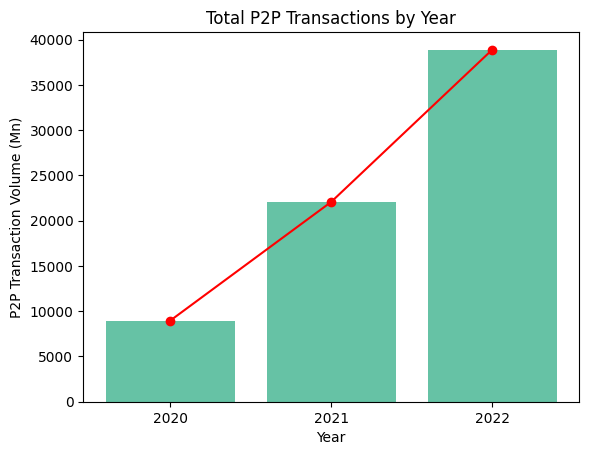

In [ ]:
sum_by_year['Year'] = sum_by_year['Year'].astype(int)
plt.bar(sum_by_year['Year'], sum_by_year['P2P Volume (Mn)'])
plt.title('Total P2P Transactions by Year')
plt.xlabel('Year')
plt.ylabel('P2P Transaction Volume (Mn)')
plt.plot(sum_by_year['Year'], sum_by_year['P2P Volume (Mn)'], marker='o', color='red', label='Upward Line')


plt.xticks(sum_by_year['Year'])
plt.show()

In [ ]:
sum_by_year1 = DF5.groupby('Year')['P2M Volume (Mn)'].sum().reset_index()

print(sum_by_year1)

   Year  P2M Volume (Mn)
0  2020          6055.85
1  2021         16681.81
2  2022         35170.64


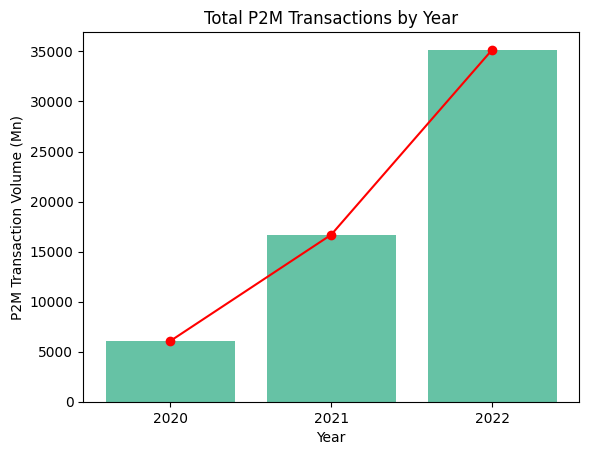

In [ ]:
sum_by_year1['Year'] = sum_by_year1['Year'].astype(int)
plt.bar(sum_by_year1['Year'], sum_by_year1['P2M Volume (Mn)'])
plt.title('Total P2M Transactions by Year')
plt.xlabel('Year')
plt.ylabel('P2M Transaction Volume (Mn)')
plt.plot(sum_by_year1['Year'], sum_by_year1['P2M Volume (Mn)'], marker='o', color='red', label='Upward Line')


plt.xticks(sum_by_year['Year'])
plt.show()

In [ ]:
p_df = DF1[DF1['Application Name']=='Paytm Payments Bank App']

p_df = p_df.drop('Month', axis=1)

In [ ]:
p_df

,Year,Date,Application Name,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","B2C Transactions, Volume (Mn)","B2C Transactions, Value (Cr)","B2B Transactions, Volume (Mn)","B2B Transactions, Value (Cr)","On-us Transactions, Volume (Mn)","On-us Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
47,2022,2022-8,Paytm Payments Bank App,871.86,96034.11,4.11,10.37,0.38,458.24,110.05,17714.37,986,114217.10
113,2022,2022-9,Paytm Payments Bank App,924.77,101163.26,2.92,9.55,0.4,489.04,109.1,19143.49,1037,120805.34
176,2022,2022-10,Paytm Payments Bank App,995.34,112062.51,4.9,14.36,0.43,541.32,108.92,21002.36,1109,133620.54
241,2022,2022-11,Paytm Payments Bank App,973.85,109008.43,4.12,14.81,0.37,491.76,103.13,19290.91,1081,128805.91
307,2022,2022-12,Paytm Payments Bank App,1054.05,118069.81,6.08,16.86,0.43,580.52,109.79,20154.47,1170,138821.66
419,2021,2021-2,Paytm Payments Bank App,290.03,34405.44,3.41,5.86,-,-,47.27,4082.22,340,38493.52
473,2021,2021-3,Paytm Payments Bank App,344.99,38653.06,2.79,4.5,-,-,53.37,4563.69,401,43221.25
527,2021,2021-4,Paytm Payments Bank App,320.78,36859.20,1.66,2.57,-,-,50.26,4607.76,372,41469.53
579,2021,2021-5,Paytm Payments Bank App,290.69,35715.48,1.57,2.84,-,-,51.56,8023,343,43741.16
629,2021,2021-6,Paytm Payments Bank App,326.53,40614.09,4.62,4.29,-,-,51.89,4362.73,383,44981.11


In [ ]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 47 to 1897
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          33 non-null     int64  
 1   Date                                          33 non-null     object 
 2   Application Name                              33 non-null     object 
 3   Customer Initiated Transactions, Volume (Mn)  33 non-null     float64
 4   Customer Initiated Transactions, Value (Cr)   33 non-null     float64
 5   B2C Transactions, Volume (Mn)                 33 non-null     object 
 6   B2C Transactions, Value (Cr)                  33 non-null     object 
 7   B2B Transactions, Volume (Mn)                 33 non-null     object 
 8   B2B Transactions, Value (Cr)                  33 non-null     object 
 9   On-us Transactions, Volume (Mn)               33 non-null     ob

In [ ]:
p_df['Date'] = pd.to_datetime(p_df['Date'])

# Set 'Date' column as the index
p_df.set_index('Date', inplace=True)

# Calculate autocorrelation for 'TotalVolume'
autocorrelation = p_df['Total, Volume (Mn)'].autocorr()

print(f"Autocorrelation between Date and Total Volume: {autocorrelation}")

Autocorrelation between Date and Total Volume: 0.7480735742638739


In [ ]:
p1_df = DF1[DF1['Application Name']=='Paytm Payments Bank App']

p1_df = p1_df.drop('Month', axis=1)

In [ ]:
p2_df = p1_df[['Date', 'Total, Volume (Mn)']]

p2_df.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 47 to 1897
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                33 non-null     object
 1   Total, Volume (Mn)  33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


In [ ]:
from warnings import simplefilter
simplefilter("ignore")

In [ ]:
p2_df.head()

,Date,"Total, Volume (Mn)"
47,2022-8,986
113,2022-9,1037
176,2022-10,1109
241,2022-11,1081
307,2022-12,1170


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
p2_df = p2_df.rename(columns={'Date': 'ds', 'Total, Volume (Mn)': 'y'})

In [ ]:
p2_df['ds'] = pd.to_datetime(p2_df['ds'])

In [ ]:
model = Prophet()

# Fit the model to the data
model.fit(p2_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzivryn00/ysvlo8c7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzivryn00/mvzjl_84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7868', 'data', 'file=/tmp/tmpzivryn00/ysvlo8c7.json', 'init=/tmp/tmpzivryn00/mvzjl_84.json', 'output', 'file=/tmp/tmpzivryn00/prophet_model32ly38m4/prophet_model-20231214104108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:41:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=24, freq = 'M')  # You can adjust the number of periods

# Predict on the future dates
forecast = model.predict(future)

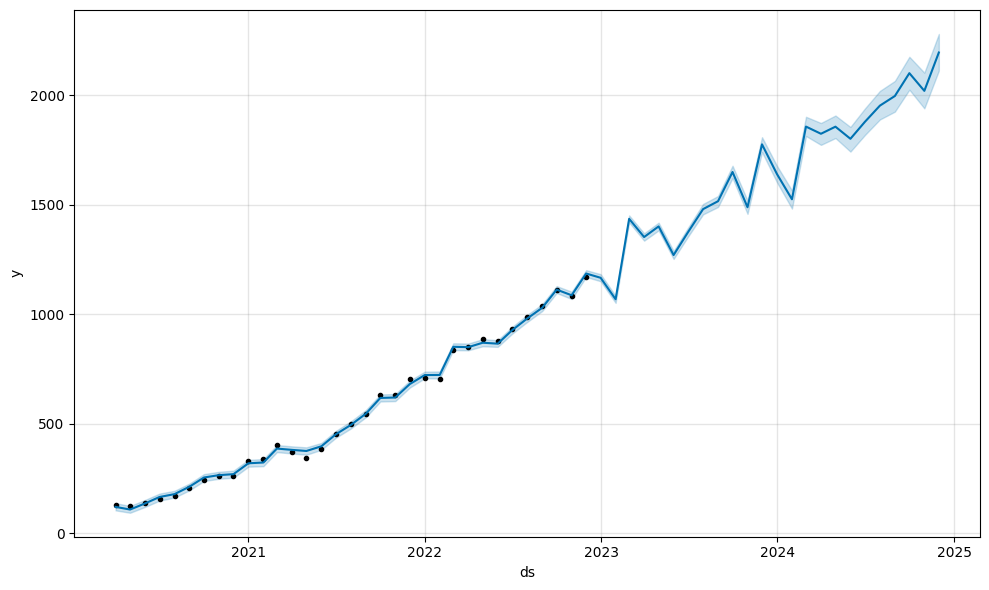

In [ ]:
fig = model.plot(forecast)

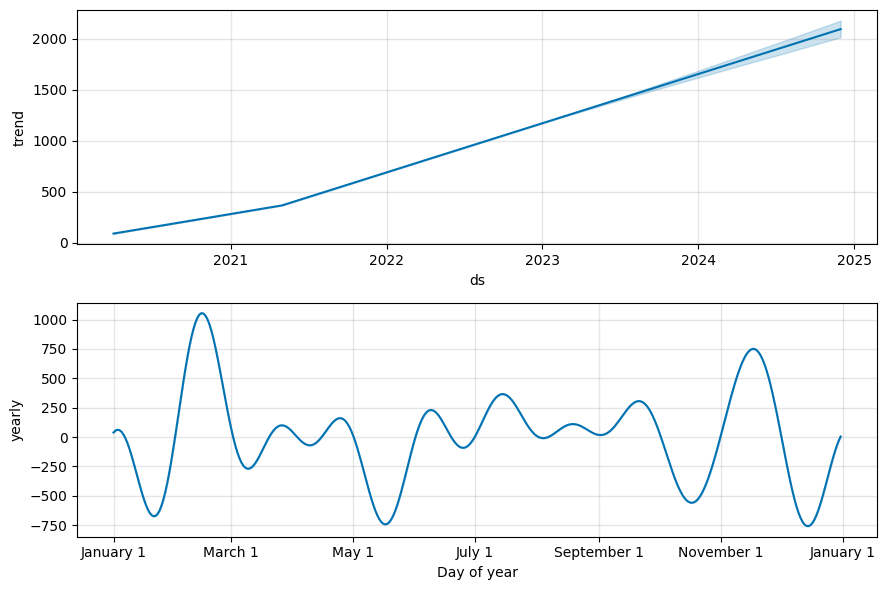

In [ ]:
fig = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

# Interactive plot of the forecast
fig = plot_plotly(model, forecast)
fig.show()

# Interactive plot of forecast components
fig = plot_components_plotly(model, forecast)
fig.show()

In [ ]:
s1_df = DF1[DF1['Application Name']=='State Bank of India Apps']

s1_df

,Month,Year,Date,Application Name,"Customer Initiated Transactions, Volume (Mn)","Customer Initiated Transactions, Value (Cr)","B2C Transactions, Volume (Mn)","B2C Transactions, Value (Cr)","B2B Transactions, Volume (Mn)","B2B Transactions, Value (Cr)","On-us Transactions, Volume (Mn)","On-us Transactions, Value (Cr)","Total, Volume (Mn)","Total, Value (Cr)"
55,NaN,2022,2022-8,State Bank of India Apps,4.10,1926.51,-,-,-,-,-,-,4,1926.51
121,NaN,2022,2022-9,State Bank of India Apps,3.57,1818.89,-,-,-,-,-,-,3,1818.89
184,NaN,2022,2022-10,State Bank of India Apps,4.10,1936.72,-,-,0,0.01,-,-,4,1936.72
251,NaN,2022,2022-11,State Bank of India Apps,4.07,1876.46,-,-,-,-,-,-,4,1876.46
317,NaN,2022,2022-12,State Bank of India Apps,4.22,1928.43,-,-,0,0,-,-,4,1928.43
428,NaN,2021,2021-2,State Bank of India Apps,4.13,2273.77,-,-,-,-,-,-,4,2273.77
482,NaN,2021,2021-3,State Bank of India Apps,4.55,2578.38,-,-,-,-,-,-,4,2578.38
534,NaN,2021,2021-4,State Bank of India Apps,4.14,2359.08,-,-,-,-,-,-,4,2359.08
586,NaN,2021,2021-5,State Bank of India Apps,3.69,2079.32,-,-,-,-,-,-,3,2079.32
636,NaN,2021,2021-6,State Bank of India Apps,3.43,1978.61,-,-,-,-,-,-,3,1978.61


In [ ]:
s1_df = s1_df.drop('Month', axis=1)

In [ ]:
s2_df = s1_df[['Date', 'Total, Volume (Mn)']]

s2_df.head()

,Date,"Total, Volume (Mn)"
55,2022-8,4
121,2022-9,3
184,2022-10,4
251,2022-11,4
317,2022-12,4


In [ ]:
s2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 55 to 1903
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                33 non-null     object
 1   Total, Volume (Mn)  33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


In [ ]:
from warnings import simplefilter
simplefilter("ignore")

In [ ]:
s2_df = s2_df.rename(columns={'Date': 'ds', 'Total, Volume (Mn)': 'y'})

In [ ]:
s2_df['ds'] = pd.to_datetime(s2_df['ds'])

In [ ]:
model = Prophet()

# Fit the model to the data
model.fit(s2_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzivryn00/vlehoi33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzivryn00/ry_usga9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52940', 'data', 'file=/tmp/tmpzivryn00/vlehoi33.json', 'init=/tmp/tmpzivryn00/ry_usga9.json', 'output', 'file=/tmp/tmpzivryn00/prophet_model0ssi0pi0/prophet_model-20231214104111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=24, freq = 'M')  # You can adjust the number of periods

# Predict on the future dates
forecast = model.predict(future)

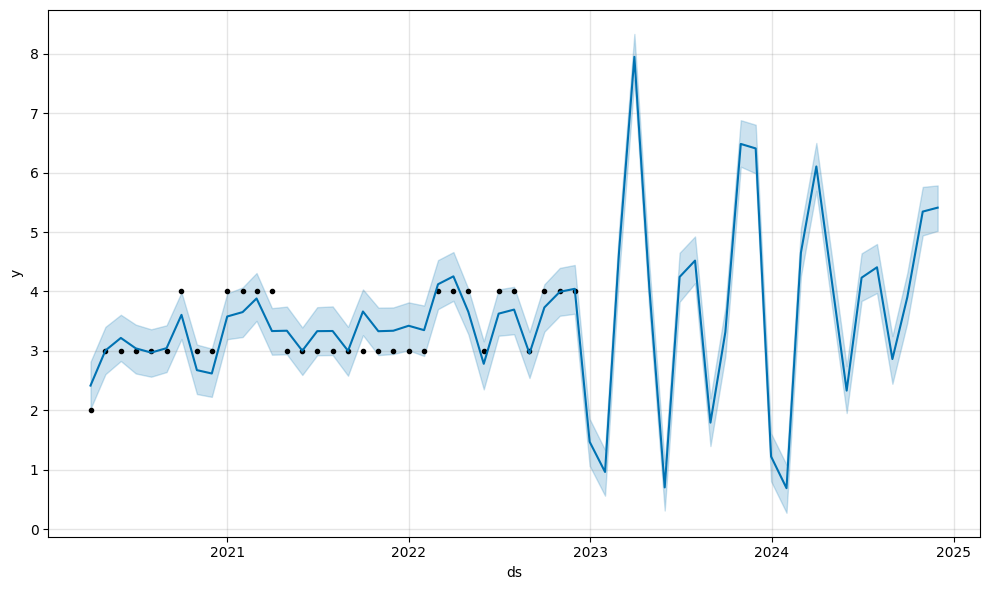

In [ ]:
fig = model.plot(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

# Interactive plot of the forecast
fig = plot_plotly(model, forecast)
fig.show()

# Interactive plot of forecast components
fig = plot_components_plotly(model, forecast)
fig.show()